## House Price Prediction - Assignment

#### Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual value and flip them at a higher price. For the same purpose, the company has collected a data set from house sales in Australia. The data is provided in the csv file below.

 

The company is looking at prospective properties to buy to enter the market.

You are required to build a regression model using regularization, so as to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house

How well those variables describe the price of a house

 

Also, determine the optimal value of lambda for ridge and lasso regression. 

#### Business Goal

You are required to model the price of houses with the available independent variables. It will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high rewards. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation

## Data Understanding and Exploration


In [2]:
# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import all libraries
import numpy as np
import pandas as pd
import pandas.testing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os



In [4]:
# Reading the dataset
house_data = pd.read_csv("train.csv", na_values="NAN")

In [5]:
# Let's take a look at the first few rows
house_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [6]:
print(house_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# check distribution of data 
house_data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

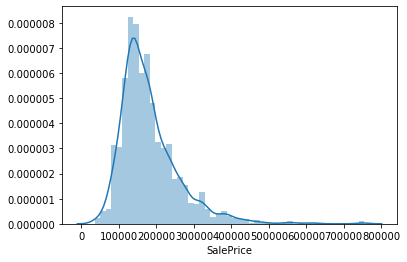

In [8]:
sns.distplot(house_data['SalePrice'])

In [9]:
print("Skewness: %f" % house_data['SalePrice'].skew())
print("Kurtosis: %f" % house_data['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


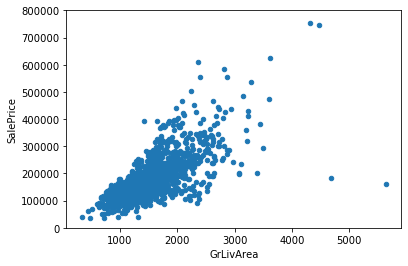

In [10]:
var = 'GrLivArea'
data = pd.concat([house_data['SalePrice'], house_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

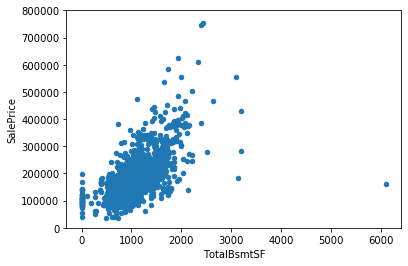

In [11]:
var = 'TotalBsmtSF'
data = pd.concat([house_data['SalePrice'], house_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

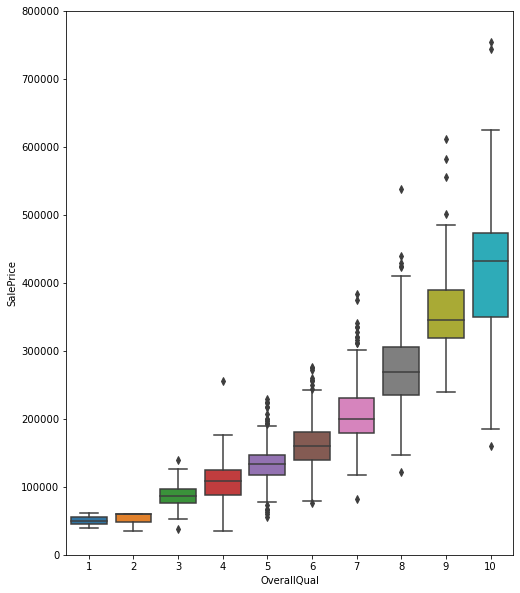

In [12]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([house_data['SalePrice'], house_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 10))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

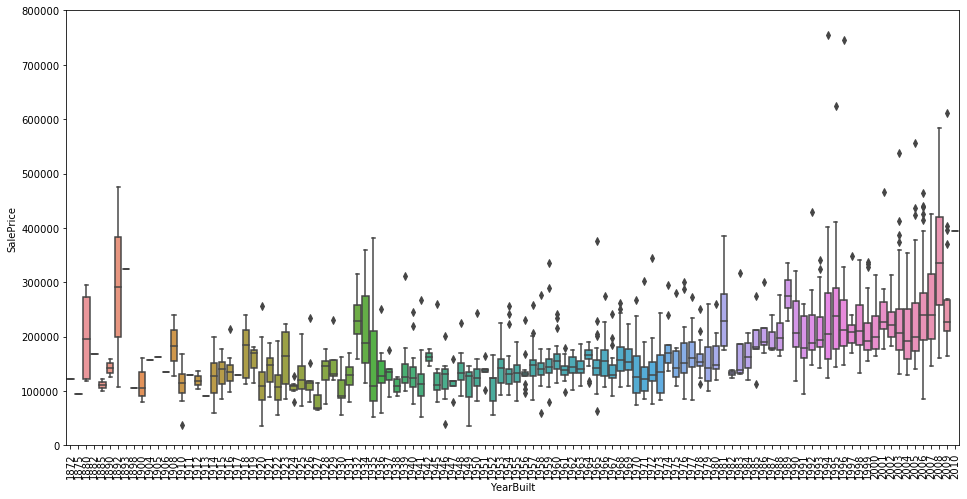

In [13]:
var = 'YearBuilt'
data = pd.concat([house_data['SalePrice'], house_data[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

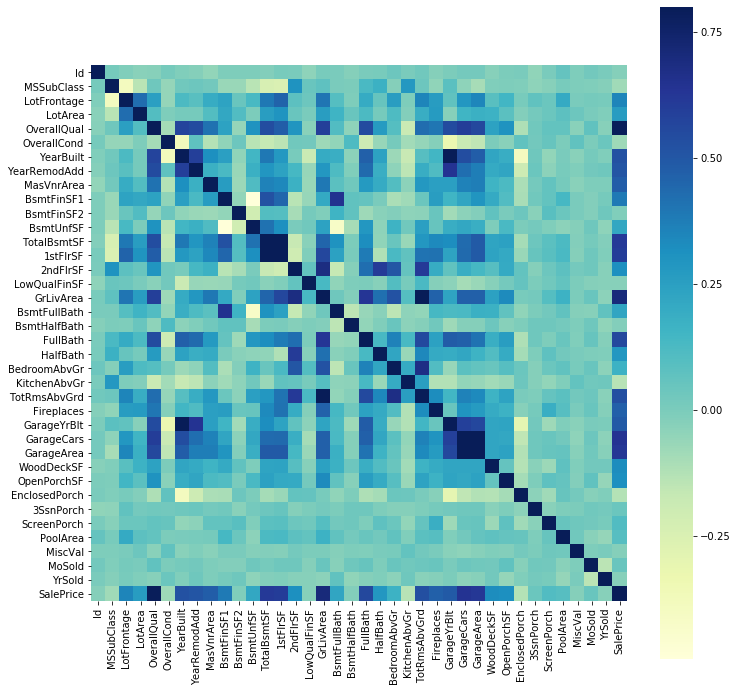

In [15]:
#correlation matrix
corrmat = house_data.corr()
f, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(corrmat,cmap="YlGnBu", vmax=.8, square=True);

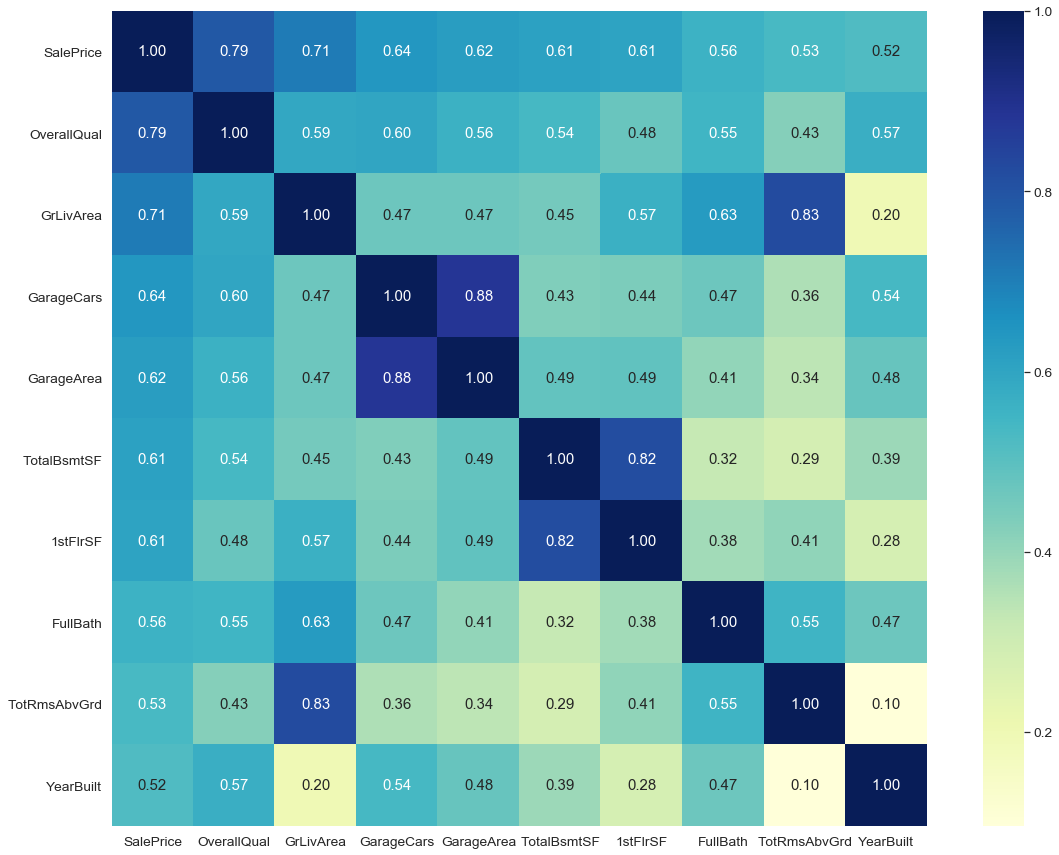

In [16]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
plt.figure(figsize = (20, 15))
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(house_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cmap="YlGnBu", cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

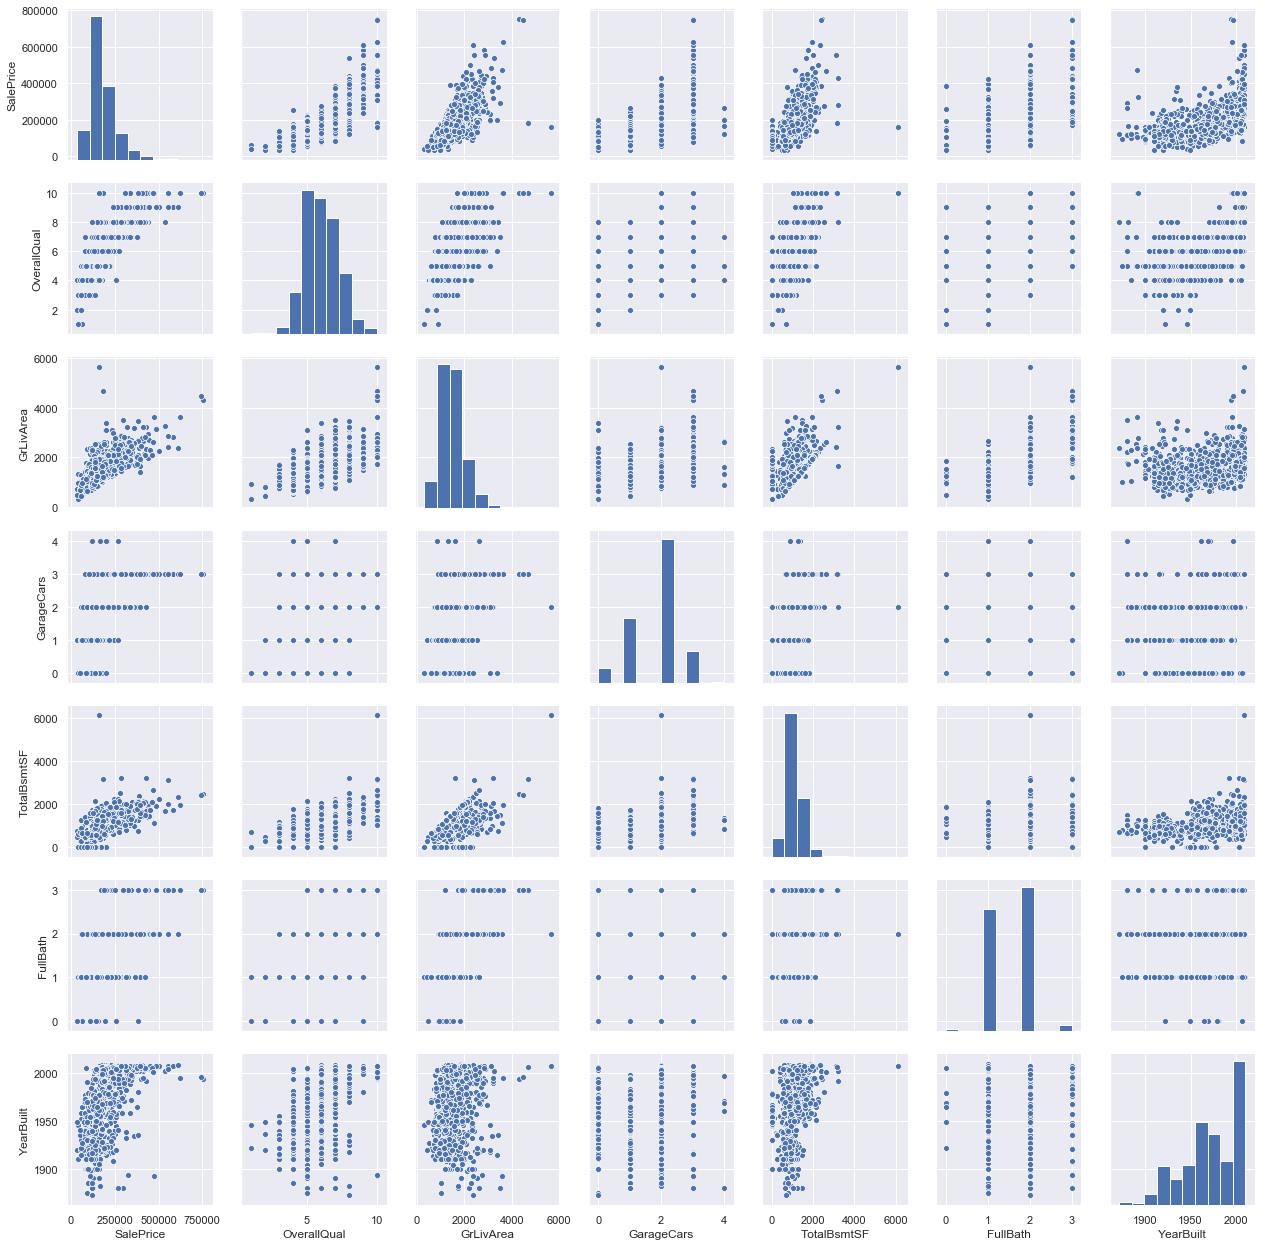

In [17]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(house_data[cols], size = 2.5)
plt.show();

## Data Cleaning

### Missing data

In [18]:
#missing data
total = house_data.isnull().sum().sort_values(ascending=False)
percent = (house_data.isnull().sum()/house_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageCond       81  0.055479
GarageType       81  0.055479
GarageYrBlt      81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtFinType1     37  0.025342
BsmtCond         37  0.025342
BsmtQual         37  0.025342
MasVnrArea        8  0.005479
MasVnrType        8  0.005479
Electrical        1  0.000685
Utilities         0  0.000000

### Imputing Null Values
#### Places Where NaN Means Something

In [19]:
#Found these features on the description data file provided

null_meaning = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [20]:
for i in null_meaning:
    house_data[i].fillna("None", inplace=True)
    house_data[i].fillna("None", inplace=True)

#### Imputing "Real" NaN Values
These are the real NaN values that we have to deal with accordingly because they were not recorded.

In [21]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [22]:
#missing data
total = house_data.isnull().sum().sort_values(ascending=False)
percent = (house_data.isnull().sum()/house_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

Total   Percent
LotFrontage    259  0.177397
GarageYrBlt     81  0.055479
MasVnrType       8  0.005479
MasVnrArea       8  0.005479
Electrical       1  0.000685
SalePrice        0  0.000000

LotFrontage has too many Null values and it is a numerical value so it may be better to just drop it.

In [23]:
house_data.drop("LotFrontage", axis=1, inplace=True)

In [24]:
#missing data
total = house_data.isnull().sum().sort_values(ascending=False)
percent = (house_data.isnull().sum()/house_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

Total   Percent
GarageYrBlt     81  0.055479
MasVnrType       8  0.005479
MasVnrArea       8  0.005479
Electrical       1  0.000685
SalePrice        0  0.000000

GarageYrBlt, MasVnrArea, and MasVnrType all have a fairly decent amount of missing values. MasVnrType is categorical so it can be replaced with the missing values as "None".  Others can be filled with median.

In [25]:
house_data["GarageYrBlt"].fillna(house_data["GarageYrBlt"].median(), inplace=True)
house_data["MasVnrArea"].fillna(house_data["MasVnrArea"].median(), inplace=True)
house_data["MasVnrType"].fillna("None", inplace=True)

In [26]:
#missing data
total = house_data.isnull().sum().sort_values(ascending=False)
percent = (house_data.isnull().sum()/house_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

Total   Percent
Electrical       1  0.000685
SalePrice        0  0.000000
Foundation       0  0.000000
RoofMatl         0  0.000000
Exterior1st      0  0.000000

Now only one row i.e 'Electrical' has a null entry, better to drop it.

In [27]:
house_data.dropna(inplace=True)

In [28]:
#missing data
total = house_data.isnull().sum().sort_values(ascending=False)
percent = (house_data.isnull().sum()/house_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

Total  Percent
SalePrice          0      0.0
SaleCondition      0      0.0
RoofMatl           0      0.0
Exterior1st        0      0.0
Exterior2nd        0      0.0

In [29]:
print(house_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [30]:
# Let's drop duplicate columns if any present in data set 
house_data = house_data.drop_duplicates()
house_data.shape

(1459, 80)

In [31]:
# Let's check number of unique entries in each column
house_data.nunique()

Id               1459
MSSubClass         15
MSZoning            5
LotArea          1072
Street              2
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 80, dtype: int64

## Data Preparation

#### Outliers Treatment

In [32]:
# let's take all numeric (float and int) variables in the dataset
# to check pairplot and heatmap
house_data_numeric = house_data.select_dtypes(include=['float64', 'int64'])
house_data_numeric.head()

Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0   1          60     8450            7            5       2003          2003   
1   2          20     9600            6            8       1976          1976   
2   3          60    11250            7            5       2001          2002   
3   4          70     9550            7            5       1915          1970   
4   5          60    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  OpenPorchSF  \
0       196.0         706           0  ...           0           61   
1         0.0         978           0  ...         298            0   
2       162.0         486           0  ...           0           42   
3         0.0         216           0  ...           0           35   
4       350.0         655           0  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 37 columns]

In [33]:
# now let's drop some columns from numeric data frame to inspect outlier in each column
# As inspecting outlier on these column's doesn't make any sense
house_data_numeric = house_data_numeric.drop(['GarageYrBlt','YearBuilt','YrSold',
                                              'YearRemodAdd','MoSold','BsmtFullBath',
                                              'BsmtHalfBath','FullBath','HalfBath',
                                              'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd',
                                              'OverallQual','OverallQual','GarageCars',
                                              'OverallCond','Fireplaces'], axis=1)

In [34]:
# Check data distribution in different columns to check outliers
house_data_numeric.describe()

Id   MSSubClass        LotArea   MasVnrArea   BsmtFinSF1  \
count  1459.000000  1459.000000    1459.000000  1459.000000  1459.000000   
mean    730.054832    56.881426   10517.363948   103.187800   443.943797   
std     421.411181    42.310746    9984.666267   180.773158   456.106417   
min       1.000000    20.000000    1300.000000     0.000000     0.000000   
25%     365.500000    20.000000    7549.000000     0.000000     0.000000   
50%     730.000000    50.000000    9477.000000     0.000000   384.000000   
75%    1094.500000    70.000000   11603.000000   164.500000   712.500000   
max    1460.000000   190.000000  215245.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  ...  \
count  1459.000000  1459.000000  1459.000000  1459.000000  1459.000000  ...   
mean     46.581220   567.366004  1057.891021  1162.906785   346.791638  ...   
std     161.369977   441.992392   438.500975   386.572089   436.610637  ...   
min       0.000000     0.000000     0.000000   334.000000     0.000000  ...   
25%       0.000000   223.000000   796.000000   882.000000     0.000000  ...   
50%       0.000000   479.000000   992.000000  1088.000000     0.000000  ...   
75%       0.000000   808.000000  1298.500000  1391.500000   728.000000  ...   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000  ...   

         GrLivArea   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1459.000000  1459.000000  1459.000000  1459.000000    1459.000000   
mean   1515.546950   473.030158    94.240576    46.692255      21.969157   
std     525.650927   213.869604   125.381679    66.267472      61.137400   
min     334.000000     0.000000     0.000000     0.000000       0.000000   
25%    1129.000000   333.000000     0.000000     0.000000       0.000000   
50%    1464.000000   480.000000     0.000000    25.000000       0.000000   
75%    1777.500000   576.000000   168.000000    68.000000       0.000000   
max    5642.000000  1418.000000   857.000000   547.000000     552.000000   

         3SsnPorch  ScreenPorch     PoolArea       MiscVal      SalePrice  
count  1459.000000  1459.000000  1459.000000   1459.000000    1459.000000  
mean      3.411926    15.071282     2.760795     43.518849  180930.394791  
std      29.327247    55.775138    40.191018    496.291826   79468.964025  
min       0.000000     0.000000     0.000000      0.000000   34900.000000  
25%       0.000000     0.000000     0.000000      0.000000  129950.000000  
50%       0.000000     0.000000     0.000000      0.000000  163000.000000  
75%       0.000000     0.000000     0.000000      0.000000  214000.000000  
max     508.000000   480.000000   738.000000  15500.000000  755000.000000  

[8 rows x 21 columns]

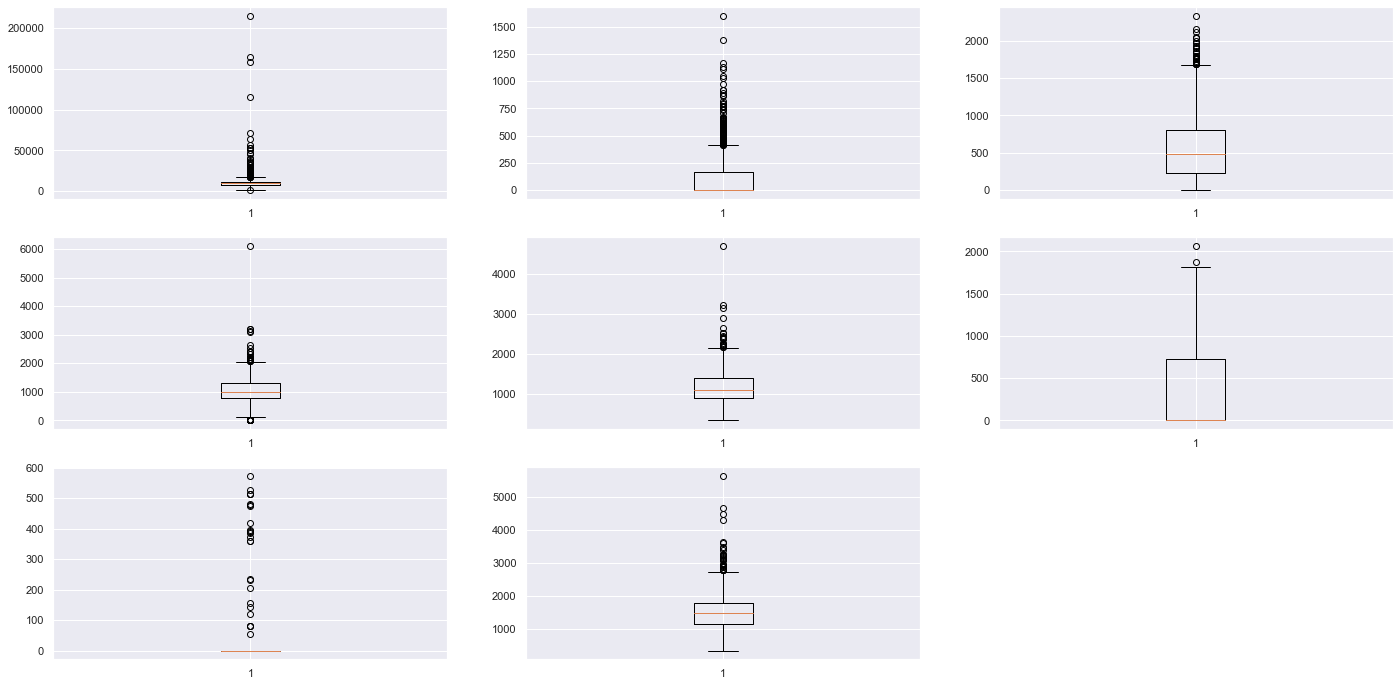

In [35]:
plt.figure(figsize=(24, 12))

plt.subplot(3,3,1)
plt.boxplot(house_data.LotArea)
plt.subplot(3,3,2)
plt.boxplot(house_data.MasVnrArea)
plt.subplot(3,3,3)
plt.boxplot(house_data.BsmtUnfSF)
plt.subplot(3,3,4)
plt.boxplot(house_data.TotalBsmtSF)
plt.subplot(3,3,5)
plt.boxplot(house_data['1stFlrSF'])
plt.subplot(3,3,6)
plt.boxplot(house_data['2ndFlrSF'])
plt.subplot(3,3,7)
plt.boxplot(house_data.LowQualFinSF)
plt.subplot(3,3,8)
plt.boxplot(house_data.GrLivArea)
plt.show()

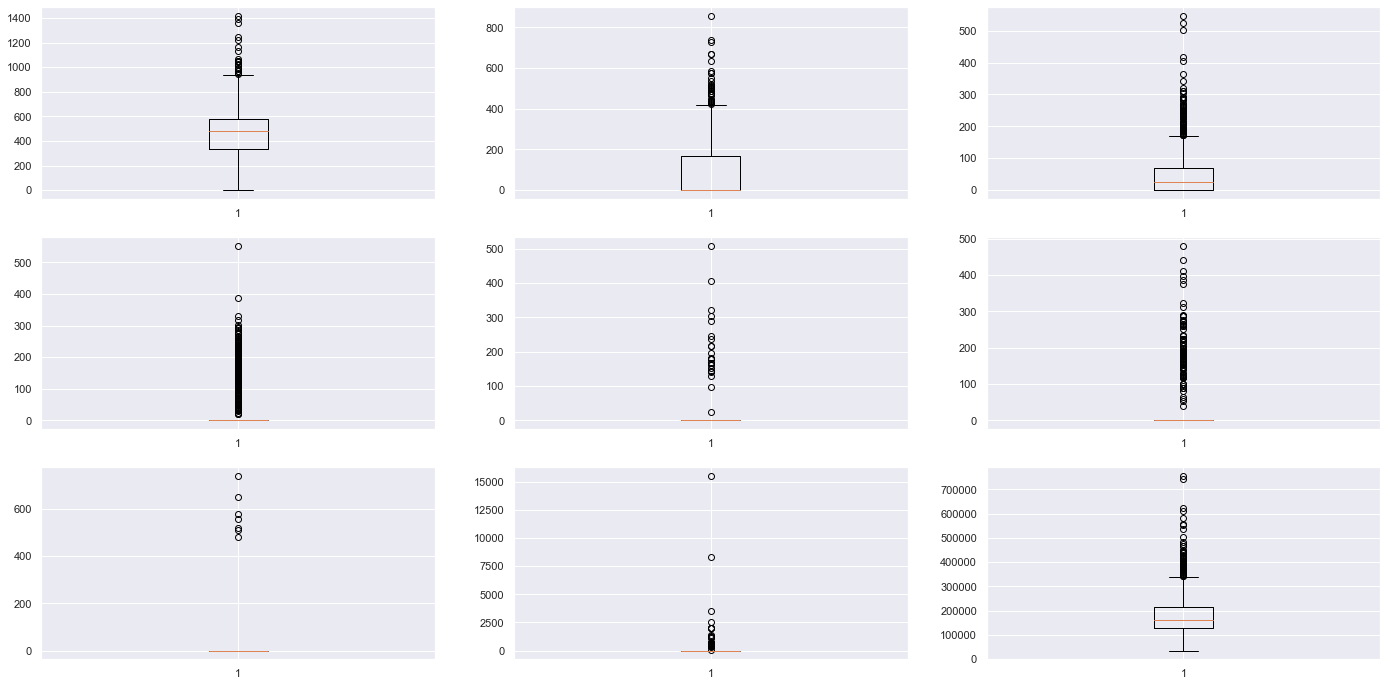

In [36]:
plt.figure(figsize=(24, 12))
plt.subplot(3,3,1)
plt.boxplot(house_data.GarageArea)
plt.subplot(3,3,2)
plt.boxplot(house_data.WoodDeckSF)
plt.subplot(3,3,3)
plt.boxplot(house_data.OpenPorchSF)
plt.subplot(3,3,4)
plt.boxplot(house_data.EnclosedPorch)
plt.subplot(3,3,5)
plt.boxplot(house_data['3SsnPorch'])
plt.subplot(3,3,6)
plt.boxplot(house_data.ScreenPorch)
plt.subplot(3,3,7)
plt.boxplot(house_data.PoolArea)
plt.subplot(3,3,8)
plt.boxplot(house_data.MiscVal)
plt.subplot(3,3,9)
plt.boxplot(house_data.SalePrice)
plt.show()

The outlier treatment is done for LotArea, PoolArea, MiscVal

In [37]:
# outlier treatment for LotArea
Q1 = house_data.LotArea.quantile(0.25)
Q3 = house_data.LotArea.quantile(0.75)
IQR = Q3 - Q1
house_data = house_data[(house_data.LotArea >= Q1 - 1.5*IQR) & (house_data.LotArea <= Q3 + 1.5*IQR)]

In [38]:
# outlier treatment for PoolArea
Q1 = house_data.PoolArea.quantile(0.25)
Q3 = house_data.PoolArea.quantile(0.75)
IQR = Q3 - Q1
house_data = house_data[(house_data.PoolArea >= Q1 - 1.5*IQR) & (house_data.PoolArea <= Q3 + 1.5*IQR)]

In [39]:
# outlier treatment for MiscVal
Q1 = house_data.MiscVal.quantile(0.25)
Q3 = house_data.MiscVal.quantile(0.75)
IQR = Q3 - Q1
house_data = house_data[(house_data.MiscVal >= Q1 - 1.5*IQR) & (house_data.MiscVal <= Q3 + 1.5*IQR)]

In [40]:
# Check number of row retained after outlier treatment
house_data.shape

(1340, 80)

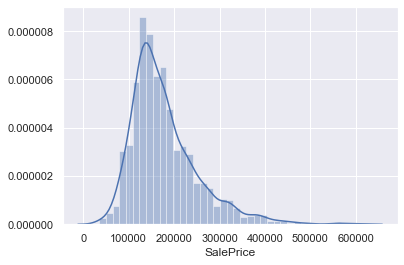

In [41]:
sns.distplot(house_data["SalePrice"])

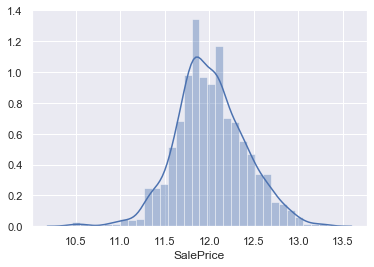

In [42]:
sns.distplot(np.log(house_data["SalePrice"]))

It is seen that the target, SalePrice, is very skewed and a transformation like a logarithm would make it more normally distributed. Machine Learning models tend to work much better with normally distributed targets, rather than greatly skewed targets. By transforming the prices, we can boost model performance.

In [43]:
house_data["TransformedPrice"] = np.log(house_data["SalePrice"])

In [44]:
house_data.head()

Id  MSSubClass MSZoning  LotArea Street Alley LotShape LandContour  \
0   1          60       RL     8450   Pave  None      Reg         Lvl   
1   2          20       RL     9600   Pave  None      Reg         Lvl   
2   3          60       RL    11250   Pave  None      IR1         Lvl   
3   4          70       RL     9550   Pave  None      IR1         Lvl   
4   5          60       RL    14260   Pave  None      IR1         Lvl   

  Utilities LotConfig  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
0    AllPub    Inside  ...   None  None        None       0      2   2008   
1    AllPub       FR2  ...   None  None        None       0      5   2007   
2    AllPub    Inside  ...   None  None        None       0      9   2008   
3    AllPub    Corner  ...   None  None        None       0      2   2006   
4    AllPub       FR2  ...   None  None        None       0     12   2008   

   SaleType  SaleCondition  SalePrice  TransformedPrice  
0        WD         Normal     208500         12.247694  
1        WD         Normal     181500         12.109011  
2        WD         Normal     223500         12.317167  
3        WD        Abnorml     140000         11.849398  
4        WD         Normal     250000         12.429216  

[5 rows x 81 columns]

## Model Building

In [45]:
X = house_data.drop(["Id", "SalePrice", "TransformedPrice"], axis=1)
y = house_data["SalePrice"]

In [46]:
X.head()

MSSubClass MSZoning  LotArea Street Alley LotShape LandContour Utilities  \
0          60       RL     8450   Pave  None      Reg         Lvl    AllPub   
1          20       RL     9600   Pave  None      Reg         Lvl    AllPub   
2          60       RL    11250   Pave  None      IR1         Lvl    AllPub   
3          70       RL     9550   Pave  None      IR1         Lvl    AllPub   
4          60       RL    14260   Pave  None      IR1         Lvl    AllPub   

  LotConfig LandSlope  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0    Inside       Gtl  ...           0        0   None  None        None   
1       FR2       Gtl  ...           0        0   None  None        None   
2    Inside       Gtl  ...           0        0   None  None        None   
3    Corner       Gtl  ...           0        0   None  None        None   
4       FR2       Gtl  ...           0        0   None  None        None   

   MiscVal  MoSold  YrSold  SaleType SaleCondition  
0        0       2    2008        WD        Normal  
1        0       5    2007        WD        Normal  
2        0       9    2008        WD        Normal  
3        0       2    2006        WD       Abnorml  
4        0      12    2008        WD        Normal  

[5 rows x 78 columns]

In [47]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [48]:
# creating dummy variables for yes/no categorical variables
# we'll map yes to 1 and no to 0
binary_vars_list =  ['CentralAir']

# defining the map function
def binary_map(x):
    return x.map({'Y': 1, "N": 0})

# applying the function to column with yes /no data
X[binary_vars_list] = X[binary_vars_list].apply(binary_map)
X.head()

MSSubClass MSZoning  LotArea Street Alley LotShape LandContour Utilities  \
0          60       RL     8450   Pave  None      Reg         Lvl    AllPub   
1          20       RL     9600   Pave  None      Reg         Lvl    AllPub   
2          60       RL    11250   Pave  None      IR1         Lvl    AllPub   
3          70       RL     9550   Pave  None      IR1         Lvl    AllPub   
4          60       RL    14260   Pave  None      IR1         Lvl    AllPub   

  LotConfig LandSlope  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0    Inside       Gtl  ...           0        0   None  None        None   
1       FR2       Gtl  ...           0        0   None  None        None   
2    Inside       Gtl  ...           0        0   None  None        None   
3    Corner       Gtl  ...           0        0   None  None        None   
4       FR2       Gtl  ...           0        0   None  None        None   

   MiscVal  MoSold  YrSold  SaleType SaleCondition  
0        0       2    2008        WD        Normal  
1        0       5    2007        WD        Normal  
2        0       9    2008        WD        Normal  
3        0       2    2006        WD       Abnorml  
4        0      12    2008        WD        Normal  

[5 rows x 78 columns]

In [49]:
# seperate all categorical variables to create dummy variables
house_data_categorical = X.select_dtypes(include=['object'])
house_data_categorical.head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave  None      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave  None      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave  None      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave  None      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave  None      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1      Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
3      Crawfor       Norm  ...     Detchd          Unf         TA         TA   
4      NoRidge       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0          Y   None  None        None       WD        Normal  
1          Y   None  None        None       WD        Normal  
2          Y   None  None        None       WD        Normal  
3          Y   None  None        None       WD       Abnorml  
4          Y   None  None        None       WD        Normal  

[5 rows x 42 columns]

In [50]:
# convert categorical variables into dummies
house_data_dummies = pd.get_dummies(house_data_categorical, drop_first=True)
house_data_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   Alley_None  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  ...  \
0           1           0             0             0             1  ...   
1           1           0             0             0             1  ...   
2           1           0             0             0             0  ...   
3           1           0             0             0             0  ...   
4           1           0             0             0             0  ...   

   SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0               0             0             0            1   
1               0               0             0             0            1   
2               0               0             0             0            1   
3               0               0             0             0            1   
4               0               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 210 columns]

In [51]:
# drop original categorical variables after creating dummies
X = X.drop(list(house_data_categorical.columns), axis=1)

In [52]:
# concat dummy variables with X
X = pd.concat([X, house_data_dummies], axis=1)

In [53]:
X.shape

(1340, 246)

In [54]:
X.head()

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0          60     8450            7            5       2003          2003   
1          20     9600            6            8       1976          1976   
2          60    11250            7            5       2001          2002   
3          70     9550            7            5       1915          1970   
4          60    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_ConLI  \
0       196.0         706           0        150  ...               0   
1         0.0         978           0        284  ...               0   
2       162.0         486           0        434  ...               0   
3         0.0         216           0        540  ...               0   
4       350.0         655           0        490  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 246 columns]

In [55]:
# Scale data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_var = X.columns
X[scale_var] = scaler.fit_transform(X[scale_var])

In [56]:
# Check data after scaling
X.describe()

MSSubClass      LotArea  OverallQual  OverallCond    YearBuilt  \
count  1340.000000  1340.000000  1340.000000  1340.000000  1340.000000   
mean      0.220413     0.478820     0.567579     0.569963     0.724292   
std       0.251646     0.199116     0.152952     0.137247     0.220230   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.365104     0.444444     0.500000     0.594203   
50%       0.176471     0.479252     0.555556     0.500000     0.742754   
75%       0.294118     0.602245     0.666667     0.625000     0.936594   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  ...  \
count   1340.000000  1340.000000  1340.000000  1340.000000  1340.000000  ...   
mean       0.587600     0.063830     0.196282     0.029613     0.245752  ...   
std        0.345295     0.109223     0.194787     0.105233     0.191005  ...   
min        0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%        0.283333     0.000000     0.000000     0.000000     0.098352  ...   
50%        0.733333     0.000000     0.171161     0.000000     0.207406  ...   
75%        0.900000     0.103750     0.321069     0.000000     0.345890  ...   
max        1.000000     1.000000     1.000000     1.000000     1.000000  ...   

       SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
count     1340.000000     1340.000000   1340.000000   1340.000000   
mean         0.002985        0.003731      0.086567      0.002239   
std          0.054575        0.060993      0.281305      0.047281   
min          0.000000        0.000000      0.000000      0.000000   
25%          0.000000        0.000000      0.000000      0.000000   
50%          0.000000        0.000000      0.000000      0.000000   
75%          0.000000        0.000000      0.000000      0.000000   
max          1.000000        1.000000      1.000000      1.000000   

       SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
count  1340.000000            1340.000000           1340.000000   
mean      0.864925               0.002985              0.006716   
std       0.341931               0.054575              0.081709   
min       0.000000               0.000000              0.000000   
25%       1.000000               0.000000              0.000000   
50%       1.000000               0.000000              0.000000   
75%       1.000000               0.000000              0.000000   
max       1.000000               1.000000              1.000000   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count           1340.000000           1340.000000            1340.000000  
mean               0.014925              0.817910               0.088060  
std                0.121300              0.386062               0.283488  
min                0.000000              0.000000               0.000000  
25%                0.000000              1.000000               0.000000  
50%                0.000000              1.000000               0.000000  
75%                0.000000              1.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 246 columns]

In [57]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [58]:
# let's build a Linear regression model first
from sklearn import metrics
# linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9489501392691729

In [59]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-7.141083768885729e+19

In [60]:
# model coefficients
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 1.5028743726722736e+16),
 ('MSSubClass', -12323.195),
 ('LotArea', 35275.827),
 ('OverallQual', 46065.91),
 ('OverallCond', 45546.124),
 ('YearBuilt', 57882.906),
 ('YearRemodAdd', 9980.307),
 ('MasVnrArea', 11958.359),
 ('BsmtFinSF1', -1.1261890129964872e+16),
 ('BsmtFinSF2', -7586849200919677.0),
 ('BsmtUnfSF', -1.2023663319788658e+16),
 ('TotalBsmtSF', 1.6501654367902012e+16),
 ('CentralAir', -2318.204),
 ('1stFlrSF', 3.4704212137999084e+16),
 ('2ndFlrSF', 1.9318758035364476e+16),
 ('LowQualFinSF', 6331659989239218.0),
 ('GrLivArea', -3.733041201974949e+16),
 ('BsmtFullBath', 1133.868),
 ('BsmtHalfBath', -2204.21),
 ('FullBath', 18568.45),
 ('HalfBath', 9740.713),
 ('BedroomAbvGr', -31453.361),
 ('KitchenAbvGr', -25199.664),
 ('TotRmsAbvGrd', 15872.318),
 ('Fireplaces', 14261.791),
 ('GarageYrBlt', -282.498),
 ('GarageCars', 19170.46),
 ('GarageArea', 15796.721),
 ('WoodDeckSF', 3716.947),
 ('OpenPorchSF', 8238.872),
 ('EnclosedPorch', 10580.967),
 ('3SsnPorch', 11692.

It's clearly visible that in this model, accuracy will be very poor on test data set. So let's build regression model using regularization.

##### Lasso regression

In [61]:
# lasso regression without tuning hyper parameter
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9489514632092882
0.9044009530276946


In [62]:
# lasso model parameters without tuning hyper parameter
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', -47451.234),
 ('MSSubClass', -12252.449),
 ('LotArea', 35273.137),
 ('OverallQual', 46103.704),
 ('OverallCond', 45571.277),
 ('YearBuilt', 57891.459),
 ('YearRemodAdd', 9976.594),
 ('MasVnrArea', 11981.98),
 ('BsmtFinSF1', 72929.871),
 ('BsmtFinSF2', 29005.072),
 ('BsmtUnfSF', 32317.205),
 ('TotalBsmtSF', 31272.574),
 ('CentralAir', -2323.647),
 ('1stFlrSF', 116072.336),
 ('2ndFlrSF', 74394.498),
 ('LowQualFinSF', 19391.0),
 ('GrLivArea', 25932.345),
 ('BsmtFullBath', 1146.987),
 ('BsmtHalfBath', -2174.328),
 ('FullBath', 18569.308),
 ('HalfBath', 9739.412),
 ('BedroomAbvGr', -31466.405),
 ('KitchenAbvGr', -25180.721),
 ('TotRmsAbvGrd', 15795.516),
 ('Fireplaces', 14268.592),
 ('GarageYrBlt', -247.939),
 ('GarageCars', 19149.86),
 ('GarageArea', 15775.17),
 ('WoodDeckSF', 3723.246),
 ('OpenPorchSF', 8227.951),
 ('EnclosedPorch', 10554.765),
 ('3SsnPorch', 11681.258),
 ('ScreenPorch', 4666.28),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('MoSold', 2886.196),
 ('YrSold', -263

So let's tune the alpha / hyper parameter to get balanced model.

In [63]:
# Now let's do k fold with r2 score and tune hyper parameter
# grid search CV
from sklearn.model_selection import KFold
# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200]}

# grid search
# lasso model
model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   28.3s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [64]:
# results data frame 
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.151170      0.016294         0.000000        0.000000      0.0001   
1       0.211699      0.080809         0.000807        0.001613       0.001   
2       0.322471      0.037424         0.000795        0.001590        0.01   
3       0.312424      0.031245         0.006250        0.007654        0.05   
4       0.315551      0.038771         0.003125        0.006249         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.881927           0.910201           0.901488   
1   {'alpha': 0.001}           0.881930           0.910202           0.901483   
2    {'alpha': 0.01}           0.881960           0.910215           0.901452   
3    {'alpha': 0.05}           0.882095           0.910262           0.901266   
4     {'alpha': 0.1}           0.882262           0.910302           0.900960   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.925816  ...         0.901139        0.016010               27   
1           0.925821  ...         0.901140        0.016011               26   
2           0.925863  ...         0.901157        0.016012               25   
3           0.925919  ...         0.901195        0.015976               24   
4           0.925984  ...         0.901224        0.015929               23   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.957325             0.95077            0.951527   
1            0.957325             0.95077            0.951527   
2            0.957325             0.95077            0.951527   
3            0.957325             0.95077            0.951527   
4            0.957325             0.95077            0.951526   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.948877            0.954162          0.952532         0.002936  
1            0.948877            0.954162          0.952532         0.002936  
2            0.948877            0.954162          0.952532         0.002936  
3            0.948877            0.954161          0.952532         0.002936  
4            0.948876            0.954160          0.952531         0.002936  

[5 rows x 21 columns]

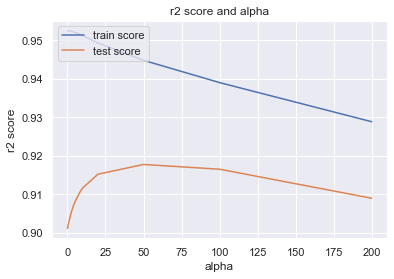

In [65]:
# plot to choose optimal value of aplha / hyper parameter
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.title("r2 score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [66]:
# Now let's do k fold with neg_mean_absolute_error score and tune hyper parameter
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   28.8s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [67]:
# results data frame
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.312310      0.040353         0.003926        0.006053      0.0001   
1       0.299920      0.050780         0.000000        0.000000       0.001   
2       0.304832      0.036137         0.000799        0.001598        0.01   
3       0.330299      0.054504         0.000000        0.000000        0.05   
4       0.330580      0.050330         0.000799        0.001598         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -17282.291982      -16092.646305      -16915.348912   
1   {'alpha': 0.001}      -17282.105190      -16092.539609      -16915.457186   
2    {'alpha': 0.01}      -17279.096447      -16091.463110      -16915.704944   
3    {'alpha': 0.05}      -17264.825407      -16087.068644      -16920.387533   
4     {'alpha': 0.1}      -17247.315569      -16083.337488      -16930.858742   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0      -14370.137084  ...    -16401.498209     1109.572676               27   
1      -14369.656495  ...    -16401.327883     1109.703294               26   
2      -14364.886601  ...    -16399.223540     1110.729721               25   
3      -14359.009671  ...    -16393.491653     1109.818959               24   
4      -14351.529270  ...    -16387.580738     1109.131356               23   

   split0_train_score  split1_train_score  split2_train_score  \
0       -10960.390546       -11417.761167       -11179.697597   
1       -10960.385728       -11417.756748       -11179.703563   
2       -10960.362994       -11417.814025       -11179.808674   
3       -10960.360906       -11418.127703       -11180.329548   
4       -10960.544287       -11418.495842       -11180.979061   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0       -11926.950240       -11145.047609     -11325.969432       333.880138  
1       -11926.951984       -11145.037787     -11325.967162       333.882119  
2       -11927.017648       -11145.061666     -11326.013002       333.902091  
3       -11927.382225       -11145.556985     -11326.351473       333.951789  
4       -11927.844098       -11146.191316     -11326.810921       333.972641  

[5 rows x 21 columns]

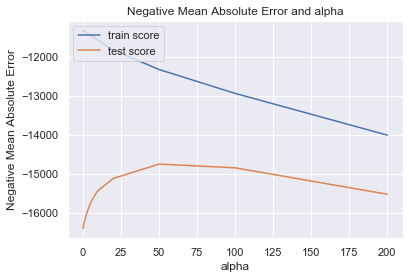

In [68]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

From both the plots we have seen that optimal value for alpha is 50. So let's use this value of alpha for regularization.

In [69]:
# model with optimal alpha = 50
# lasso regression
lm = Lasso(alpha=50)
lm.fit(X_train, y_train)


# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9417889736282932
0.9148178404640479


In [70]:
# lasso model parameters with alpha = 50
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', -14387.801),
 ('MSSubClass', -20090.121),
 ('LotArea', 32701.908),
 ('OverallQual', 55374.264),
 ('OverallCond', 41440.105),
 ('YearBuilt', 45223.087),
 ('YearRemodAdd', 9133.279),
 ('MasVnrArea', 9328.207),
 ('BsmtFinSF1', 33011.654),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 63666.885),
 ('CentralAir', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -7527.516),
 ('GrLivArea', 155067.131),
 ('BsmtFullBath', 4975.937),
 ('BsmtHalfBath', -828.907),
 ('FullBath', 14735.071),
 ('HalfBath', 9730.236),
 ('BedroomAbvGr', -14964.994),
 ('KitchenAbvGr', -1704.415),
 ('TotRmsAbvGrd', 4277.201),
 ('Fireplaces', 11971.356),
 ('GarageYrBlt', 3244.72),
 ('GarageCars', 15627.197),
 ('GarageArea', 14765.234),
 ('WoodDeckSF', 1633.783),
 ('OpenPorchSF', 6588.119),
 ('EnclosedPorch', 914.841),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 526.278),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('MoSold', 1150.259),
 ('YrSold', 0.0),
 ('MSZoning_FV', 11163.692),
 ('MSZ

With optimal value of alpha = 50, we got following score for train and test data set.

- R2 for train : 0.9417889736282932
- R2 for test : 0.9148178404640479

This score looks good and we can conclude that model is not overfitting.

##### Ridge Regression

In [71]:
# ridge regression without tuning hyper parameter
lm = Ridge(alpha=0.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9489514656348412
0.9042020553712492


So let's tune the alpha / hyper parameter to get balanced model.

In [72]:
# Now let's do k fold with r2 score and tune hyper parameter

# list of alphas to tune
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [73]:
# results data frame
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.009577      0.001964         0.000791        0.001582       0.001   
1       0.009589      0.001974         0.001581        0.001937        0.01   
2       0.005461      0.005872         0.000000        0.000000           1   
3       0.011294      0.004878         0.003202        0.001601           5   
4       0.009996      0.001784         0.000799        0.001598          10   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}           0.891865           0.881277           0.907410   
1   {'alpha': 0.01}           0.892659           0.881681           0.907979   
2    {'alpha': 1.0}           0.911786           0.895652           0.921569   
3    {'alpha': 5.0}           0.917348           0.897653           0.924432   
4   {'alpha': 10.0}           0.912614           0.891420           0.917543   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.897052  ...         0.895934        0.008966                5   
1           0.897701  ...         0.896593        0.009045                4   
2           0.908258  ...         0.910019        0.008414                2   
3           0.906088  ...         0.911194        0.009199                1   
4           0.896898  ...         0.904379        0.009653                3   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.951405            0.955846            0.951071   
1            0.951403            0.955844            0.951069   
2            0.948668            0.952864            0.948429   
3            0.939150            0.942930            0.938327   
4            0.928954            0.932815            0.927838   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.953956            0.952158          0.952887         0.001785  
1            0.953952            0.952152          0.952884         0.001785  
2            0.951318            0.949942          0.950244         0.001667  
3            0.942048            0.941299          0.940751         0.001742  
4            0.931999            0.931359          0.930593         0.001886  

[5 rows x 21 columns]

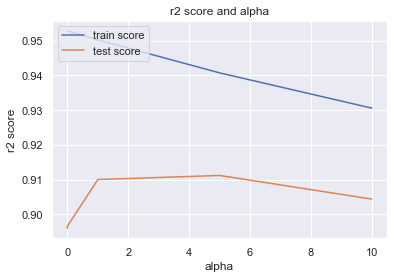

In [74]:
# plotting mean test and train scoes with alpha to tune hyper parameter
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.title("r2 score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [75]:
# Now let's do k fold with neg_mean_absolute_error score and tune hyper parameter

# list of alphas to tune
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [76]:
# results data frame
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.009588      0.001957         0.000799        0.001597       0.001   
1       0.011146      0.002964         0.000802        0.001604        0.01   
2       0.009463      0.005798         0.000000        0.000000           1   
3       0.009027      0.001556         0.002382        0.001945           5   
4       0.010387      0.001956         0.000000        0.000000          10   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}      -18000.469011      -18088.265009      -17256.887886   
1   {'alpha': 0.01}      -17954.356113      -18045.432115      -17211.987949   
2    {'alpha': 1.0}      -16458.090138      -16619.547795      -15856.763570   
3    {'alpha': 5.0}      -15720.774577      -16227.969665      -15319.659438   
4   {'alpha': 10.0}      -16159.061718      -16660.956316      -15583.155695   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0      -16644.905562  ...    -17350.269451      603.507440                5   
1      -16565.650172  ...    -17286.658081      623.680661                4   
2      -15100.952858  ...    -15933.784274      554.046751                3   
3      -14486.066044  ...    -15445.675424      570.121225                1   
4      -15059.049419  ...    -15860.283002      538.435904                2   

   split0_train_score  split1_train_score  split2_train_score  \
0       -11306.362847       -10886.451063       -11356.768819   
1       -11308.722983       -10889.924524       -11357.554770   
2       -11588.767593       -11200.468921       -11684.212675   
3       -12518.753320       -12172.520568       -12501.295941   
4       -13444.376574       -13147.408456       -13451.322592   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0       -11339.873528       -11390.971568     -11256.085565       186.820365  
1       -11342.903292       -11389.846437     -11257.790401       185.771559  
2       -11725.124724       -11641.457608     -11568.006304       189.261709  
3       -12655.435804       -12543.453158     -12478.291758       162.042199  
4       -13570.386554       -13441.437703     -13410.986376       140.392974  

[5 rows x 21 columns]

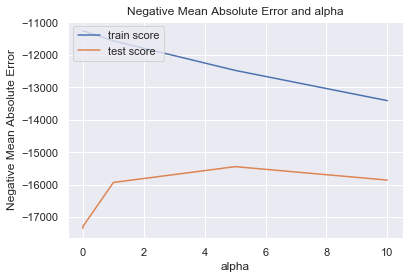

In [77]:
# plotting mean test and train scoes with alpha to tune hyper parameter
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

From both the plots we have seen that optimal value for alpha is between 1 to 5. So let's use alpha = 5.

In [79]:
# model with optimal alpha = 5
# ridge regression
lm = Ridge(alpha=5)
lm.fit(X_train, y_train)


# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9398419647556011
0.9140430295206777


In [80]:
# coefficients for optimal value of alpha = 5
ridge.fit(X_train, y_train)
ridge.coef_

array([-1.56724141e+04,  3.33582826e+04,  4.71853337e+04,  3.63455312e+04,
        3.89013540e+04,  1.08650205e+04,  1.37849615e+04,  5.00207914e+04,
        1.29247884e+04,  1.39332808e+04,  5.02323062e+04, -7.37443302e+02,
        5.68997261e+04,  3.51112322e+04,  7.57168375e+02,  7.11955629e+04,
        3.56318717e+03, -2.95731016e+03,  2.14292597e+04,  1.18203913e+04,
       -2.01597037e+04, -1.69623141e+04,  2.06844310e+04,  1.56610138e+04,
        1.04832896e+03,  1.70452296e+04,  1.89923904e+04,  4.61037414e+03,
        9.61776057e+03,  7.94818250e+03,  7.57597230e+03,  4.56040822e+03,
        0.00000000e+00,  0.00000000e+00,  2.36968116e+03, -1.63315489e+02,
        2.33763735e+04,  1.35731263e+04,  1.50437293e+04,  1.42665149e+04,
       -7.90310283e+03,  1.22169405e+03, -8.79651960e+02, -3.24898218e+03,
       -3.34667761e+03, -6.92784698e+02,  5.04090235e+03, -1.64247342e+04,
        4.37395412e+02,  0.00000000e+00,  2.18239387e+03, -9.36464281e+03,
       -5.40143163e+03, -

With optimal value of alpha = 5 for ridge regression, we got following score for train and test data set.

- R2 for train : 0.9415542365769743
- R2 for test : 0.9140067514113361

This score looks good and we can conclude that model is not overfitting.

### Conclusion

Optimal value of alpha of lasso regression is 50 and r2 score for optimal value of alpha is given below

- R2 score for train : 0.9417889736282932
- R2 score for test : 0.9148178404640479

Optimal value of alpha of ridge regression is 5 and r2 score for optimal value of alpha is given below

- R2 score for train : 0.9415542365769743
- R2 score for test : 0.9140067514113361
